<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,6.040439e-06,168.308219,168.308220,-1.799729e-06
1,0.0,1.0,84.479125,41.265477,75.963418,1.690175e-05,211.708037,211.708026,1.135504e-05
2,0.0,2.0,28.646439,27.812977,30.793218,6.591086e-05,97.252699,97.252641,5.778667e-05
3,0.0,3.0,76.757397,98.787328,41.004809,2.260485e-07,226.549534,226.549531,3.145762e-06
4,0.0,4.0,64.747145,43.165017,75.754609,-5.859656e-06,193.666764,193.666775,-1.090052e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-1.251633e-06,230.737287,230.737288,-1.221024e-06
119996,999.0,116.0,35.162750,78.053743,38.104555,8.839705e-07,161.321049,161.321048,8.686588e-07
119997,999.0,117.0,49.770665,55.161472,65.972356,2.435169e-06,180.904495,180.904493,1.631244e-06
119998,999.0,118.0,73.257335,82.663023,99.280132,4.415387e-08,265.200489,265.200489,5.109637e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,6.040439e-06,168.308219,168.308220,-1.799729e-06
1,0.0,1.0,84.479125,41.265477,75.963418,1.690175e-05,211.708037,211.708026,1.135504e-05
2,0.0,2.0,28.646439,27.812977,30.793218,6.591086e-05,97.252699,97.252641,5.778667e-05
3,0.0,3.0,76.757397,98.787328,41.004809,2.260485e-07,226.549534,226.549531,3.145762e-06
4,0.0,4.0,64.747145,43.165017,75.754609,-5.859656e-06,193.666764,193.666775,-1.090052e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-1.251633e-06,230.737287,230.737288,-1.221024e-06
119996,999.0,116.0,35.162750,78.053743,38.104555,8.839705e-07,161.321049,161.321048,8.686588e-07
119997,999.0,117.0,49.770665,55.161472,65.972356,2.435169e-06,180.904495,180.904493,1.631244e-06
119998,999.0,118.0,73.257335,82.663023,99.280132,4.415387e-08,265.200489,265.200489,5.109637e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.719242  21.335081  ...  168.308220 -1.799729e-06
      1.0    84.479125  41.265477  ...  211.708026  1.135504e-05
      2.0    28.646439  27.812977  ...   97.252641  5.778667e-05
      3.0    76.757397  98.787328  ...  226.549531  3.145762e-06
      4.0    64.747145  43.165017  ...  193.666775 -1.090052e-05
...                ...        ...  ...         ...           ...
999.0 115.0  66.677829  81.913382  ...  230.737288 -1.221024e-06
      116.0  35.162750  78.053743  ...  161.321048  8.686588e-07
      117.0  49.770665  55.161472  ...  180.904493  1.631244e-06
      118.0  73.257335  82.663023  ...  265.200489  5.109637e-07
      119.0  83.730610  78.506993  ...  271.915534  1.669297e-07

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.719242  21.335081  ...  168.308220 -1.799729e-06
      1.0    84.479125  41.265477  ...  211.708026  1.135504e-05
      2.0    28.646439  27.812977  ...   97.252641  5.778667e-05
      3.0    76.757397  98.787328  ...  226.549531  3.145762e-06
      4.0    64.747145  43.165017  ...  193.666775 -1.090052e-05
...                ...        ...  ...         ...           ...
999.0 115.0  66.677829  81.913382  ...  230.737288 -1.221024e-06
      116.0  35.162750  78.053743  ...  161.321048  8.686588e-07
      117.0  49.770665  55.161472  ...  180.904493  1.631244e-06
      118.0  73.257335  82.663023  ...  265.200489  5.109637e-07
      119.0  83.730610  78.506993  ...  271.915534  1.669297e-07

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.719242,21.335081,95.253889,6.040439e-06,168.308219,168.308220,-1.799729e-06
1,0.0,1.0,84.479125,41.265477,75.963418,1.690175e-05,211.708037,211.708026,1.135504e-05
2,0.0,2.0,28.646439,27.812977,30.793218,6.591086e-05,97.252699,97.252641,5.778667e-05
3,0.0,3.0,76.757397,98.787328,41.004809,2.260485e-07,226.549534,226.549531,3.145762e-06
4,0.0,4.0,64.747145,43.165017,75.754609,-5.859656e-06,193.666764,193.666775,-1.090052e-05
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.677829,81.913382,72.146077,-1.251633e-06,230.737287,230.737288,-1.221024e-06
119996,999.0,116.0,35.162750,78.053743,38.104555,8.839705e-07,161.321049,161.321048,8.686588e-07
119997,999.0,117.0,49.770665,55.161472,65.972356,2.435169e-06,180.904495,180.904493,1.631244e-06
119998,999.0,118.0,73.257335,82.663023,99.280132,4.415387e-08,265.200489,265.200489,5.109637e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    41.719242  21.335081  ...  168.308220 -1.799729e-06
      1.0    84.479125  41.265477  ...  211.708026  1.135504e-05
      2.0    28.646439  27.812977  ...   97.252641  5.778667e-05
      3.0    76.757397  98.787328  ...  226.549531  3.145762e-06
      4.0    64.747145  43.165017  ...  193.666775 -1.090052e-05
...                ...        ...  ...         ...           ...
999.0 115.0  66.677829  81.913382  ...  230.737288 -1.221024e-06
      116.0  35.162750  78.053743  ...  161.321048  8.686588e-07
      117.0  49.770665  55.161472  ...  180.904493  1.631244e-06
      118.0  73.257335  82.663023  ...  265.200489  5.109637e-07
      119.0  83.730610  78.506993  ...  271.915534  1.669297e-07

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

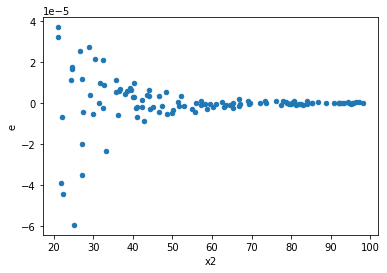

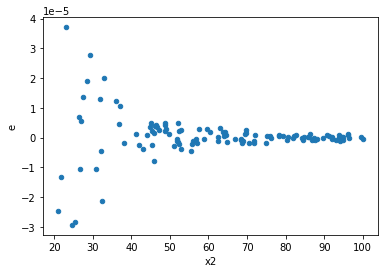

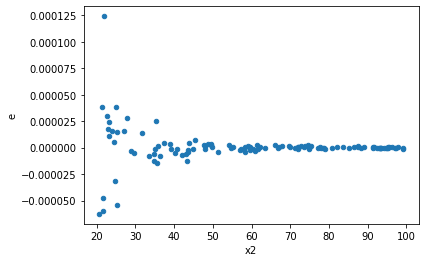

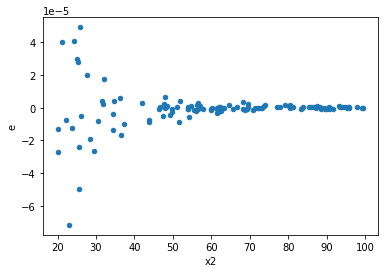

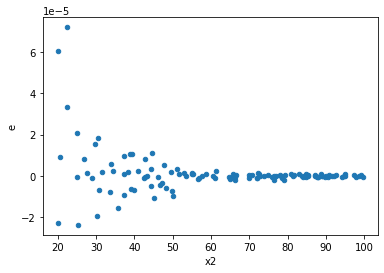

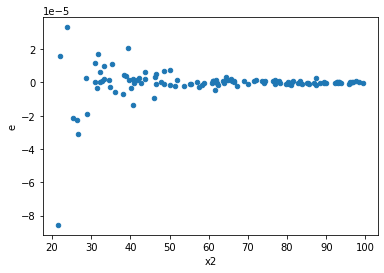

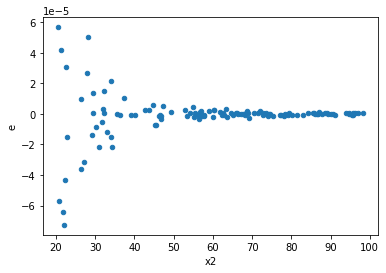

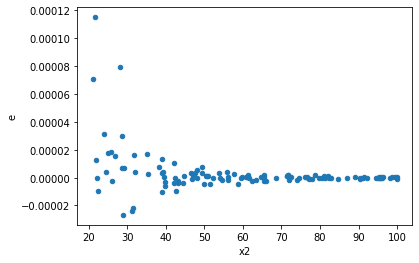

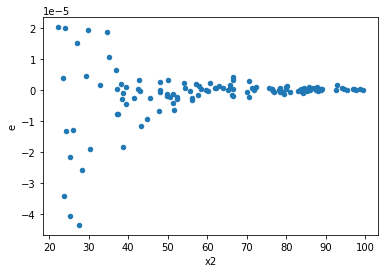

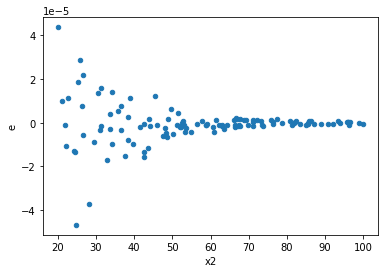

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3.9316566318809756e-11,2.254508495550316e-08,8.935583254274945e-13,5.123882944432537e-10,0.0017439085457610017,3.318582084152241e-50,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,2.4858527007770636e-11,1.485161881208231e-08,5.649665229038781e-13,3.3753679118368887e-10,0.0016737924210354334,1.3221014453568338e-50,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2.457120991456129e-11,1.1991151153669169e-08,5.58436588967302e-13,2.725261625833902e-10,0.002049111849202464,1.2336643143035372e-48,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.5412309004859693e-11,2.3195830976644397e-08,3.5027975011044755e-13,5.271779767419181e-10,0.0006644430639444718,1.2946202921845026e-59,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,4.379537523878058e-11,2.0664369713778314e-08,9.953494372450132e-13,4.696447662222344e-10,0.002119366612453671,2.6260004193444505e-48,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,3.046713385102601e-11,3.459719358793172e-08,6.924348602505912e-13,7.862998542711753e-10,0.0008806244290766299,7.254242506969654e-57,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,4.335203693520019e-11,4.729421651995135e-08,9.852735667090952e-13,1.0748685572716215e-09,0.0009166456308016409,1.7850912381426823e-56,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2.8622667947401077e-11,2.0499058820422794e-08,6.505151806227517e-13,4.658877004641544e-10,0.001396291810182275,2.2653085751125764e-52,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3.357717117634011e-11,2.3998159335696563e-08,7.631175267350025e-13,5.454127121749219e-10,0.001399156106376669,2.371911248702363e-52,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64